In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df=pd.read_csv("new_retail_data.csv")

In [ ]:
df.head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
new_df=df.dropna()

In [ ]:
df_select=new_df[["Age", "Gender", "Income", "Customer_Segment","Total_Purchases", "Total_Amount", "Product_Category", "Shipping_Method", "Payment_Method"]]

In [ ]:
df_select["Income"].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [ ]:
gender_mapping = {'Male': 0, 'Female': 1}
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
Customer_Segment_mapping = {'New': 1, 'Regular': 2, 'Premium': 3}
Payment_mapping = {'Debit Card': 1, 'Credit Card': 2, 'PayPal': 3, 'Cash': 4}
Shipping_mapping = {'Same-Day':1,'Standard':3,'Express':2}
Product_encoding = {'Clothing': 1, 'Electronics': 2, 'Books': 3, 'Home Decor': 4, 'Grocery': 5}

df_select['Gender_Encoded']=df_select["Gender"].replace(gender_mapping)
df_select['Income_Encoded']=df_select["Income"].replace(income_mapping)
df_select['Customer_Segment_Encoded']=df_select["Customer_Segment"].replace(Customer_Segment_mapping)
df_select['Payment_Encoded']=df_select["Payment_Method"].replace(Payment_mapping)
df_select['Shipping_Method_Encoded']=df_select["Shipping_Method"].replace(Shipping_mapping)
df_select['Product_Category_Encoded']=df_select["Product_Category"].replace(Product_encoding)


In [ ]:
df_select.head(5)

,Age,Gender,Income,Customer_Segment,Total_Purchases,Total_Amount,Product_Category,Shipping_Method,Payment_Method,Gender_Encoded,Income_Encoded,Customer_Segment_Encoded,Payment_Encoded,Shipping_Method_Encoded,Product_Category_Encoded
0,21.0,Male,Low,Regular,3.0,324.086270,Clothing,Same-Day,Debit Card,0,1,2,1,1,1
1,19.0,Female,Low,Premium,2.0,806.707815,Electronics,Standard,Credit Card,1,1,3,2,3,2
2,48.0,Male,Low,Regular,3.0,1063.432799,Books,Same-Day,Credit Card,0,1,2,2,1,3
3,56.0,Male,High,Premium,7.0,2466.854021,Home Decor,Standard,PayPal,0,3,3,3,3,4
4,22.0,Male,Low,Premium,2.0,248.553049,Grocery,Standard,Cash,0,1,3,4,3,5


In [ ]:
df_final=df_select[['Age', 'Total_Purchases',
       'Total_Amount', 'Product_Category_Encoded', 'Shipping_Method_Encoded',
       'Gender_Encoded', 'Income_Encoded', 'Customer_Segment_Encoded',
       'Payment_Encoded']]

In [ ]:
df_final.head(5)

,Age,Total_Purchases,Total_Amount,Product_Category_Encoded,Shipping_Method_Encoded,Gender_Encoded,Income_Encoded,Customer_Segment_Encoded,Payment_Encoded
0,21.0,3.0,324.086270,1,1,0,1,2,1
1,19.0,2.0,806.707815,2,3,1,1,3,2
2,48.0,3.0,1063.432799,3,1,0,1,2,2
3,56.0,7.0,2466.854021,4,3,0,3,3,3
4,22.0,2.0,248.553049,5,3,0,1,3,4


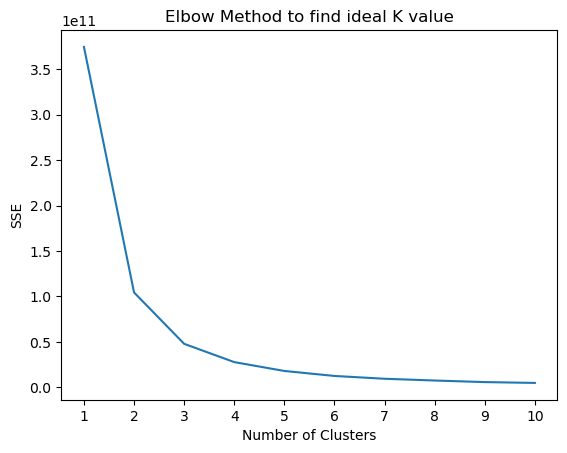

In [ ]:
# K means to find elbow point
kmeans_kwargs = {
    "init":"random",
    "n_init":10,
    "random_state":1,
}

sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(df_final)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title("Elbow Method to find ideal K value")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### Ideal value of k is 3 or 4

In [ ]:
kmeans=KMeans(init="random",n_clusters=3,n_init=10,random_state=1)
kmeans.fit(df_final)
df_final["Cluster"]=kmeans.labels_

C:\Users\gauta\AppData\Local\Temp\ipykernel_11684\4106495264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Cluster"]=kmeans.labels_


In [ ]:
df_final.head()

,Age,Total_Purchases,Total_Amount,Product_Category_Encoded,Shipping_Method_Encoded,Gender_Encoded,Income_Encoded,Customer_Segment_Encoded,Payment_Encoded,Cluster
0,21.0,3.0,324.086270,1,1,0,1,2,1,2
1,19.0,2.0,806.707815,2,3,1,1,3,2,2
2,48.0,3.0,1063.432799,3,1,0,1,2,2,2
3,56.0,7.0,2466.854021,4,3,0,3,3,3,0
4,22.0,2.0,248.553049,5,3,0,1,3,4,2



#### Look at the average values of Income, Total_Purchases, and Total_Amount for each cluster to understand their characteristics.

In [ ]:
df_final_cluster_features=df_final.groupby("Cluster").agg({
    "Income_Encoded":"mean",
    "Total_Purchases":"mean",
    "Total_Amount":"mean"
})
df_final_cluster_features

,Income_Encoded,Total_Purchases,Total_Amount
Cluster,,,
0,1.928530,6.277240,1768.803928
1,1.928352,8.519032,3423.329244
2,1.932933,3.865577,510.906710


In [ ]:
ss=df_final.groupby("Cluster").agg({
    "Income_Encoded":"median",
    "Total_Purchases":"mean",
    "Total_Amount":"mean"
})
ss

,Income_Encoded,Total_Purchases,Total_Amount
Cluster,,,
0,2.0,6.277240,1768.803928
1,2.0,8.519032,3423.329244
2,2.0,3.865577,510.906710


#### Cluster 0: "Moderate-Purchases, Moderate-Spending Shoppers"
#### Cluster 1: "High-Spending Frequent Shoppers"
#### Cluster 2: "Low-Spending, Infrequent Shoppers"

## 2-d Plot

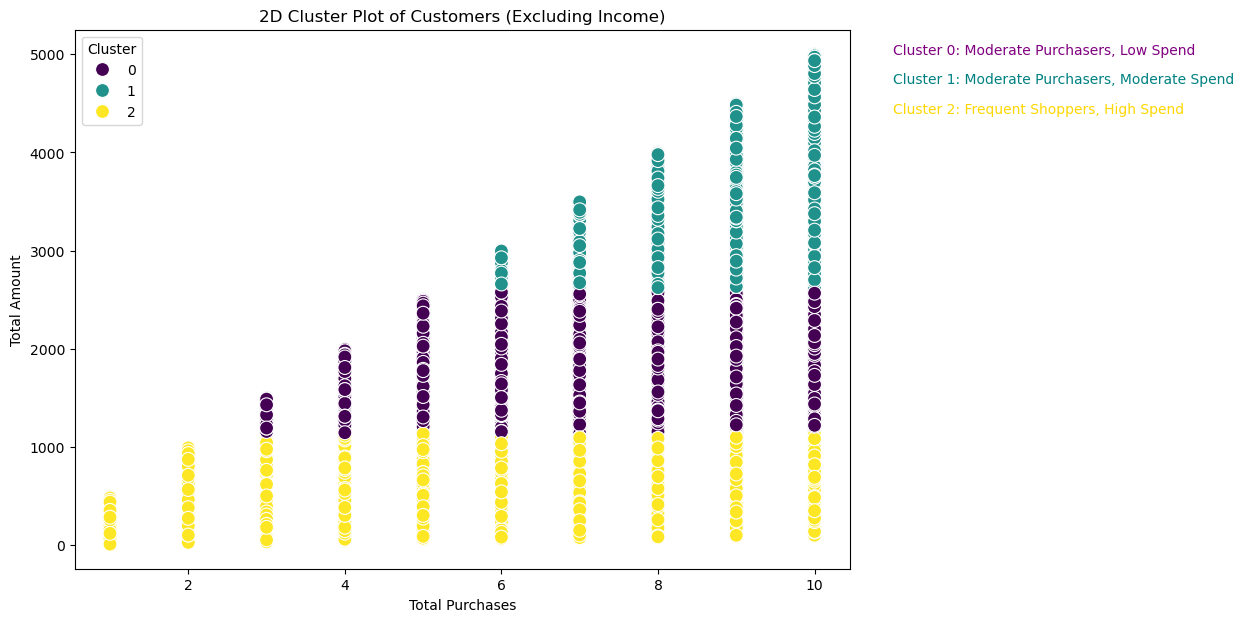

In [ ]:
plt.figure(figsize=(10, 7))

# Create a scatter plot using Total_Purchases and Total_Amount
sns.scatterplot(
    x=df_final['Total_Purchases'],
    y=df_final['Total_Amount'],
    hue=df_final['Cluster'],  # Color by cluster
    palette='viridis',
    s=100
)

# Labeling the plot
plt.title('2D Cluster Plot of Customers (Excluding Income)')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.legend(title="Cluster")
plt.text(11, 5000, "Cluster 0: Moderate Purchasers, Low Spend", fontsize=10, color='purple')
plt.text(11, 4700, "Cluster 1: Moderate Purchasers, Moderate Spend", fontsize=10, color='teal')
plt.text(11, 4400, "Cluster 2: Frequent Shoppers, High Spend", fontsize=10, color='gold')

plt.show()

## 3-d Plotting          ----Redundant

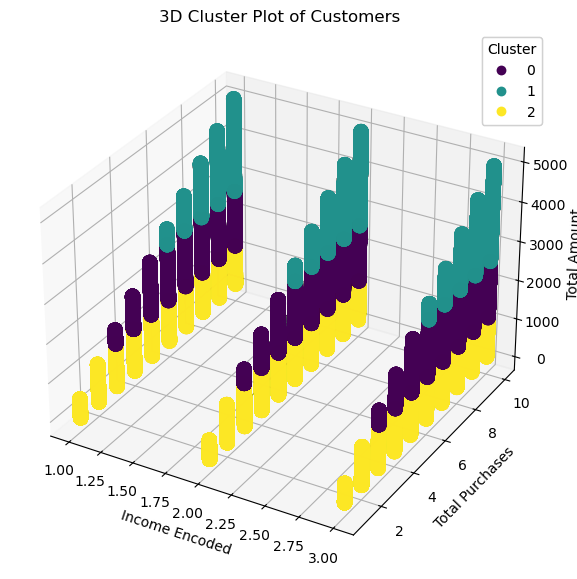

In [ ]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')

scatter = ax.scatter(
    df_final['Income_Encoded'],
    df_final['Total_Purchases'],
    df_final['Total_Amount'],
    c=df_final['Cluster'],  # Color by cluster
    cmap='viridis',
    s=100
)
ax.set_title('3D Cluster Plot of Customers')
ax.set_xlabel('Income Encoded')
ax.set_ylabel('Total Purchases')
ax.set_zlabel('Total Amount')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()